### ADA-II – HW4 - Team 1 - 04/22/2022
Jen Arriaza (Lead) - 65%<br>
Junyu (Eric) Lin - 35%<br>
Byron Liu - 0%<br>
**Algorithms**: Ada Boost Classifier<br>
**Course**: Applied Data Analytics II, 2022 Spring<br>
**Professor**: Stavros Zervoudakis

#### Problem Statement:
Our goal is to model wine quality based on features within the dataset, in this case levels of chemicals found in different wines. The wine quality scores are ordered but not balanced because there are more mid quality wines than high or low quality wine. We will attempt to classify the wine quality with LightGBM algorithm and evaluate the performance.

In [21]:
import sys
!{sys.executable} -mbrew install libomp

/Users/jenarriaza/opt/anaconda3/bin/python: No module named brew


In [ ]:
pip uninstall lightgbm
pip install lightgbm

In [18]:
import sys
!{sys.executable} -mpip install wheel

In [19]:
import sys
!{sys.executable} -mpip install pip install lightgbm

In [22]:
# importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'/Users/jenarriaza/Applied Data Analytics-II'

In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/yasserh/wine-quality-dataset")

Skipping, found downloaded files in "./wine-quality-dataset" (use force=True to force download)


In [23]:
df = pd.read_csv('WineQT.csv')

### Exploring WineQT dataset

In [3]:
# checking null values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [4]:
# displaying total number of duplicate rows/samples
df.duplicated().sum()

0

In [5]:
# describing the statistics of the given dataset
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

In [22]:
df.shape

(1143, 13)

There are 1,143 rows and 13 columns

No missing values or duplicate exist in dataset

In [6]:
# Rename columns to a more readable format
df.rename(columns = {'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar': 'residual_sugar'}, inplace=True)

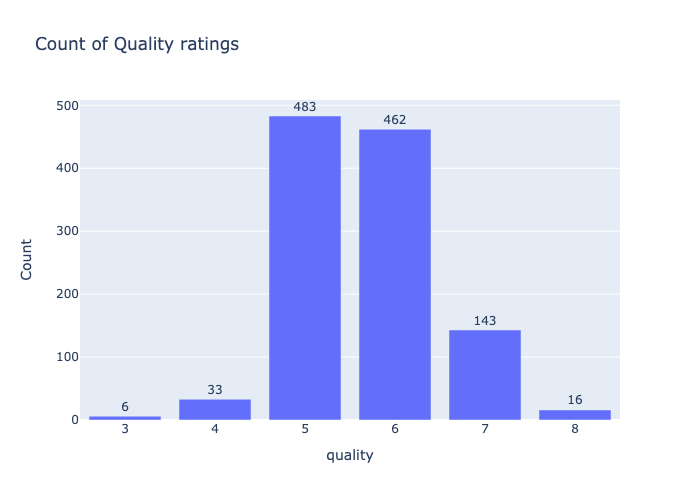

In [26]:
# Visualizing column of interest: quality

quality_ratings = df['quality'].value_counts()
x,y   = quality_ratings.index, quality_ratings.values
data  = go.Bar(x=x,y=y, text=y, textposition="outside")
Layout=go.Layout(title="Count of Quality ratings",xaxis={'title':'quality'},yaxis={'title':'Count'})
go.Figure(data,Layout)

In [24]:
# storing a list of column
col = df.columns
print(col)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')


#### Visualize dataset features

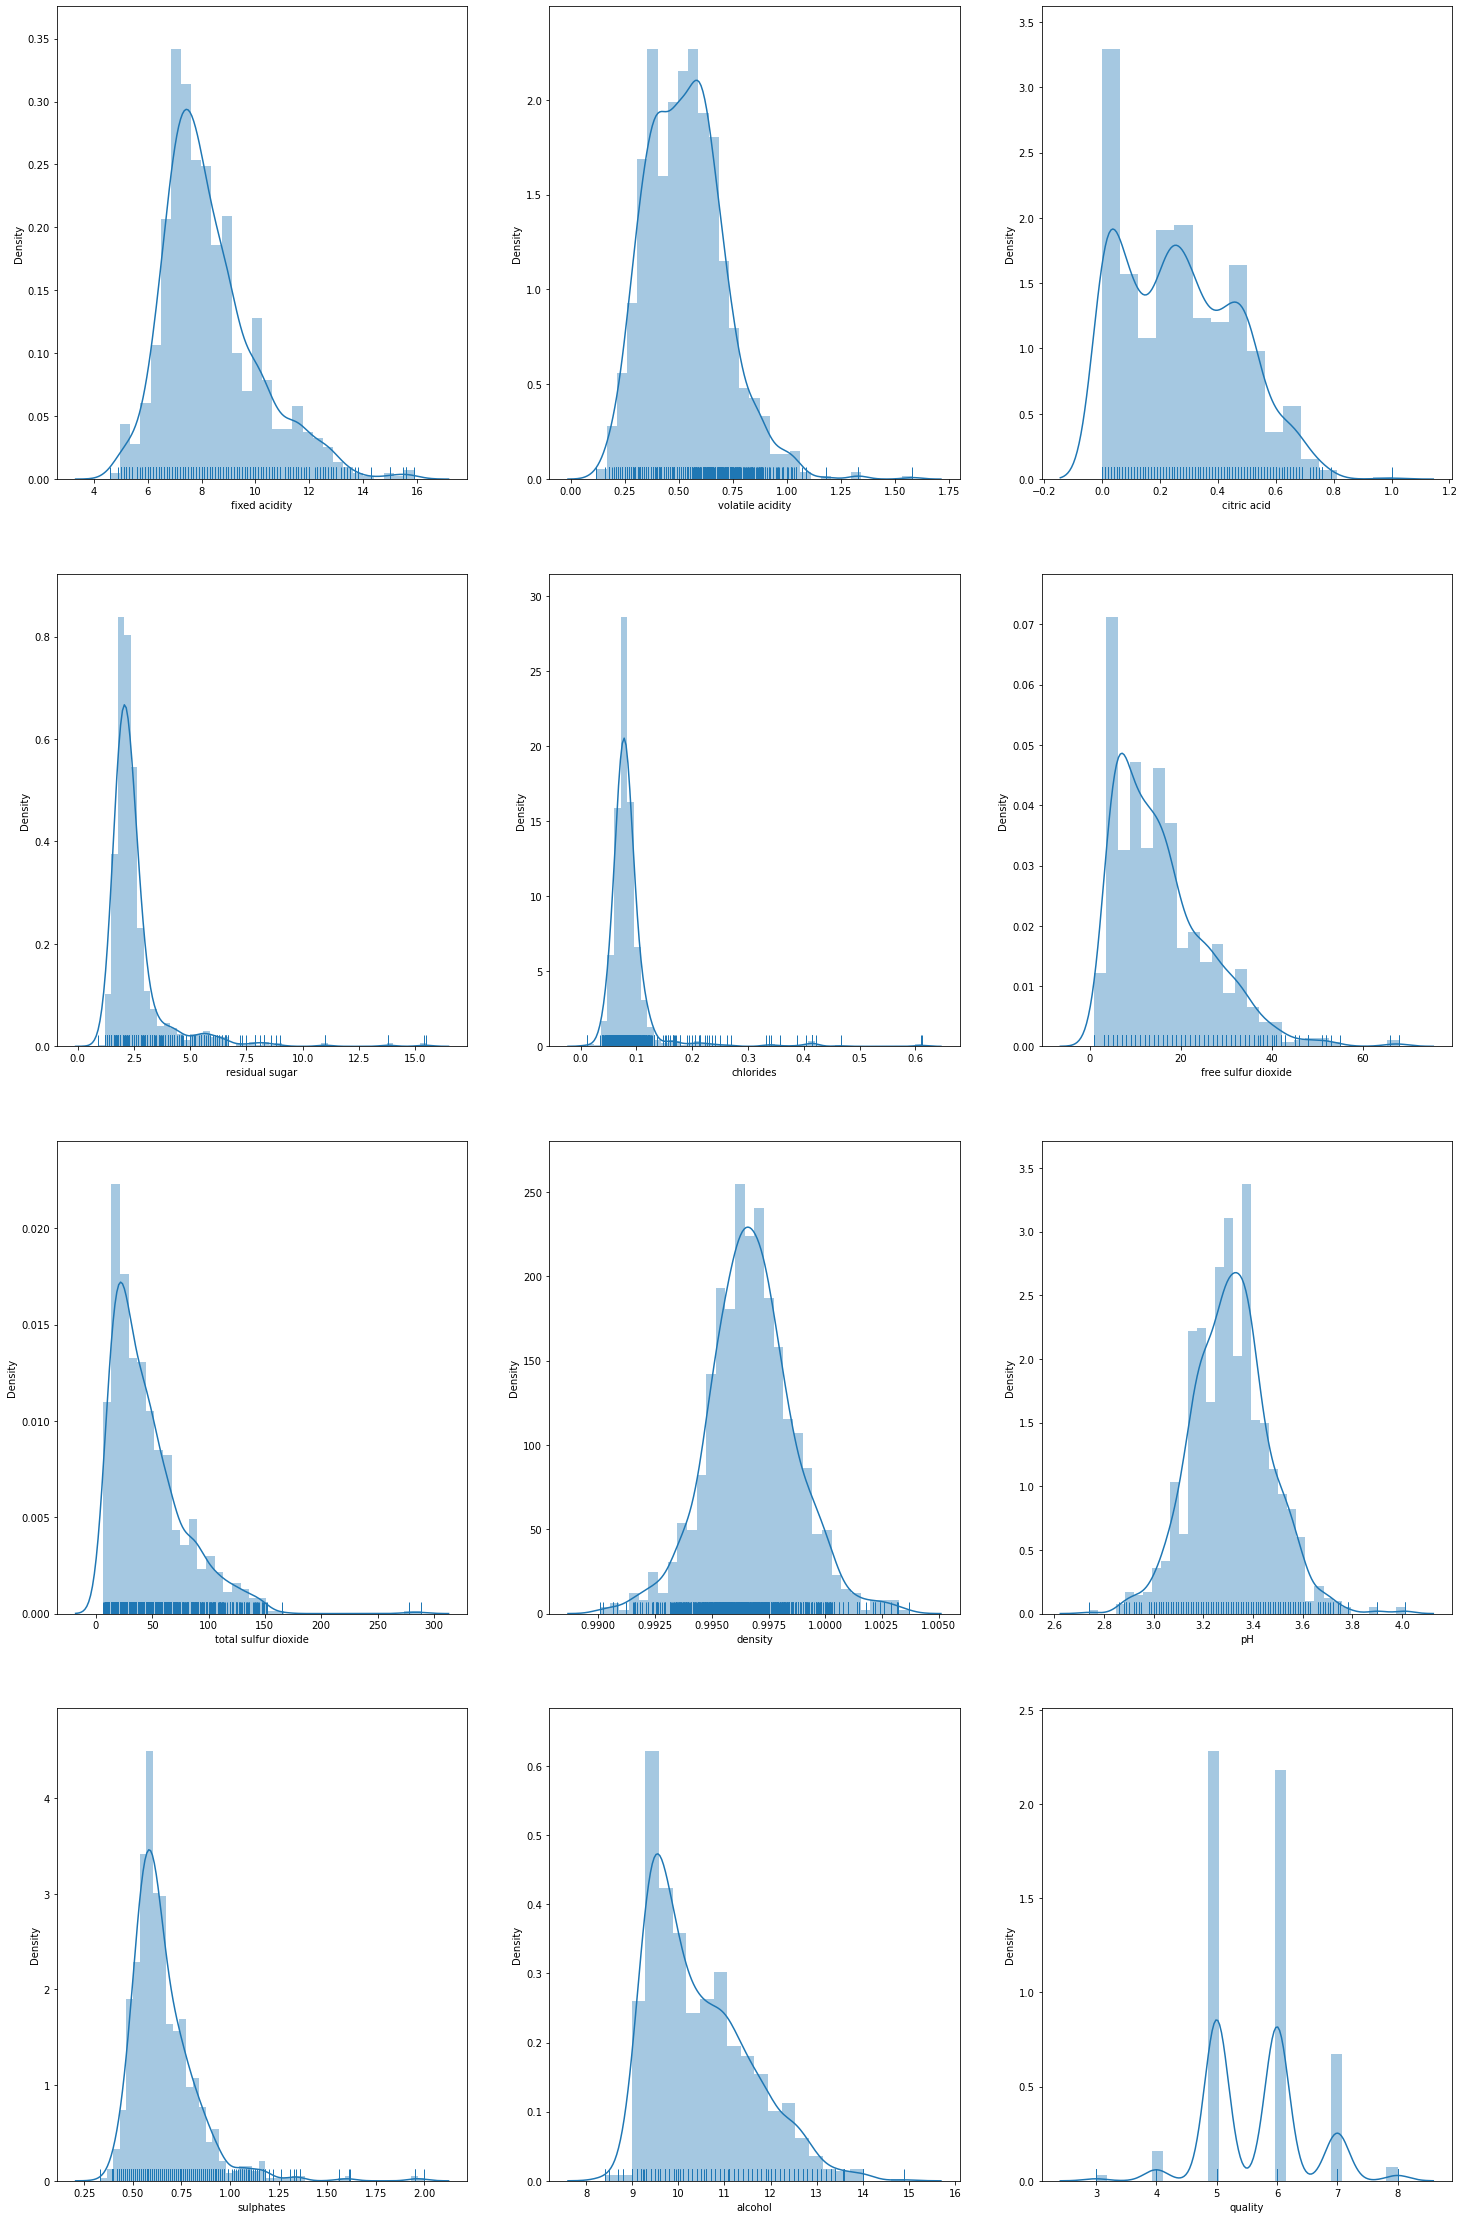

In [25]:
fig, ax = plt.subplots(4, 3, figsize=(25, 40))
k = 0

for i in range(4):
  for j in range(3):

    sns.distplot(df[col[k]], rug=True, axlabel=col[k], ax=ax[i][j])
    k += 1

### Normalize skewed categories with log transform

In [27]:
# applying log transformation
df['residual sugar'] = df['residual sugar'].apply(np.log)
df['chlorides'] = df['chlorides'].apply(np.log)
df['free sulfur dioxide'] = df['free sulfur dioxide'].apply(np.log)
df['total sulfur dioxide'] = df['total sulfur dioxide'].apply(np.log)
df['sulphates'] = df['sulphates'].apply(np.log)
df['alcohol'] = df['alcohol'].apply(np.log)

#### Visualize features after log transform

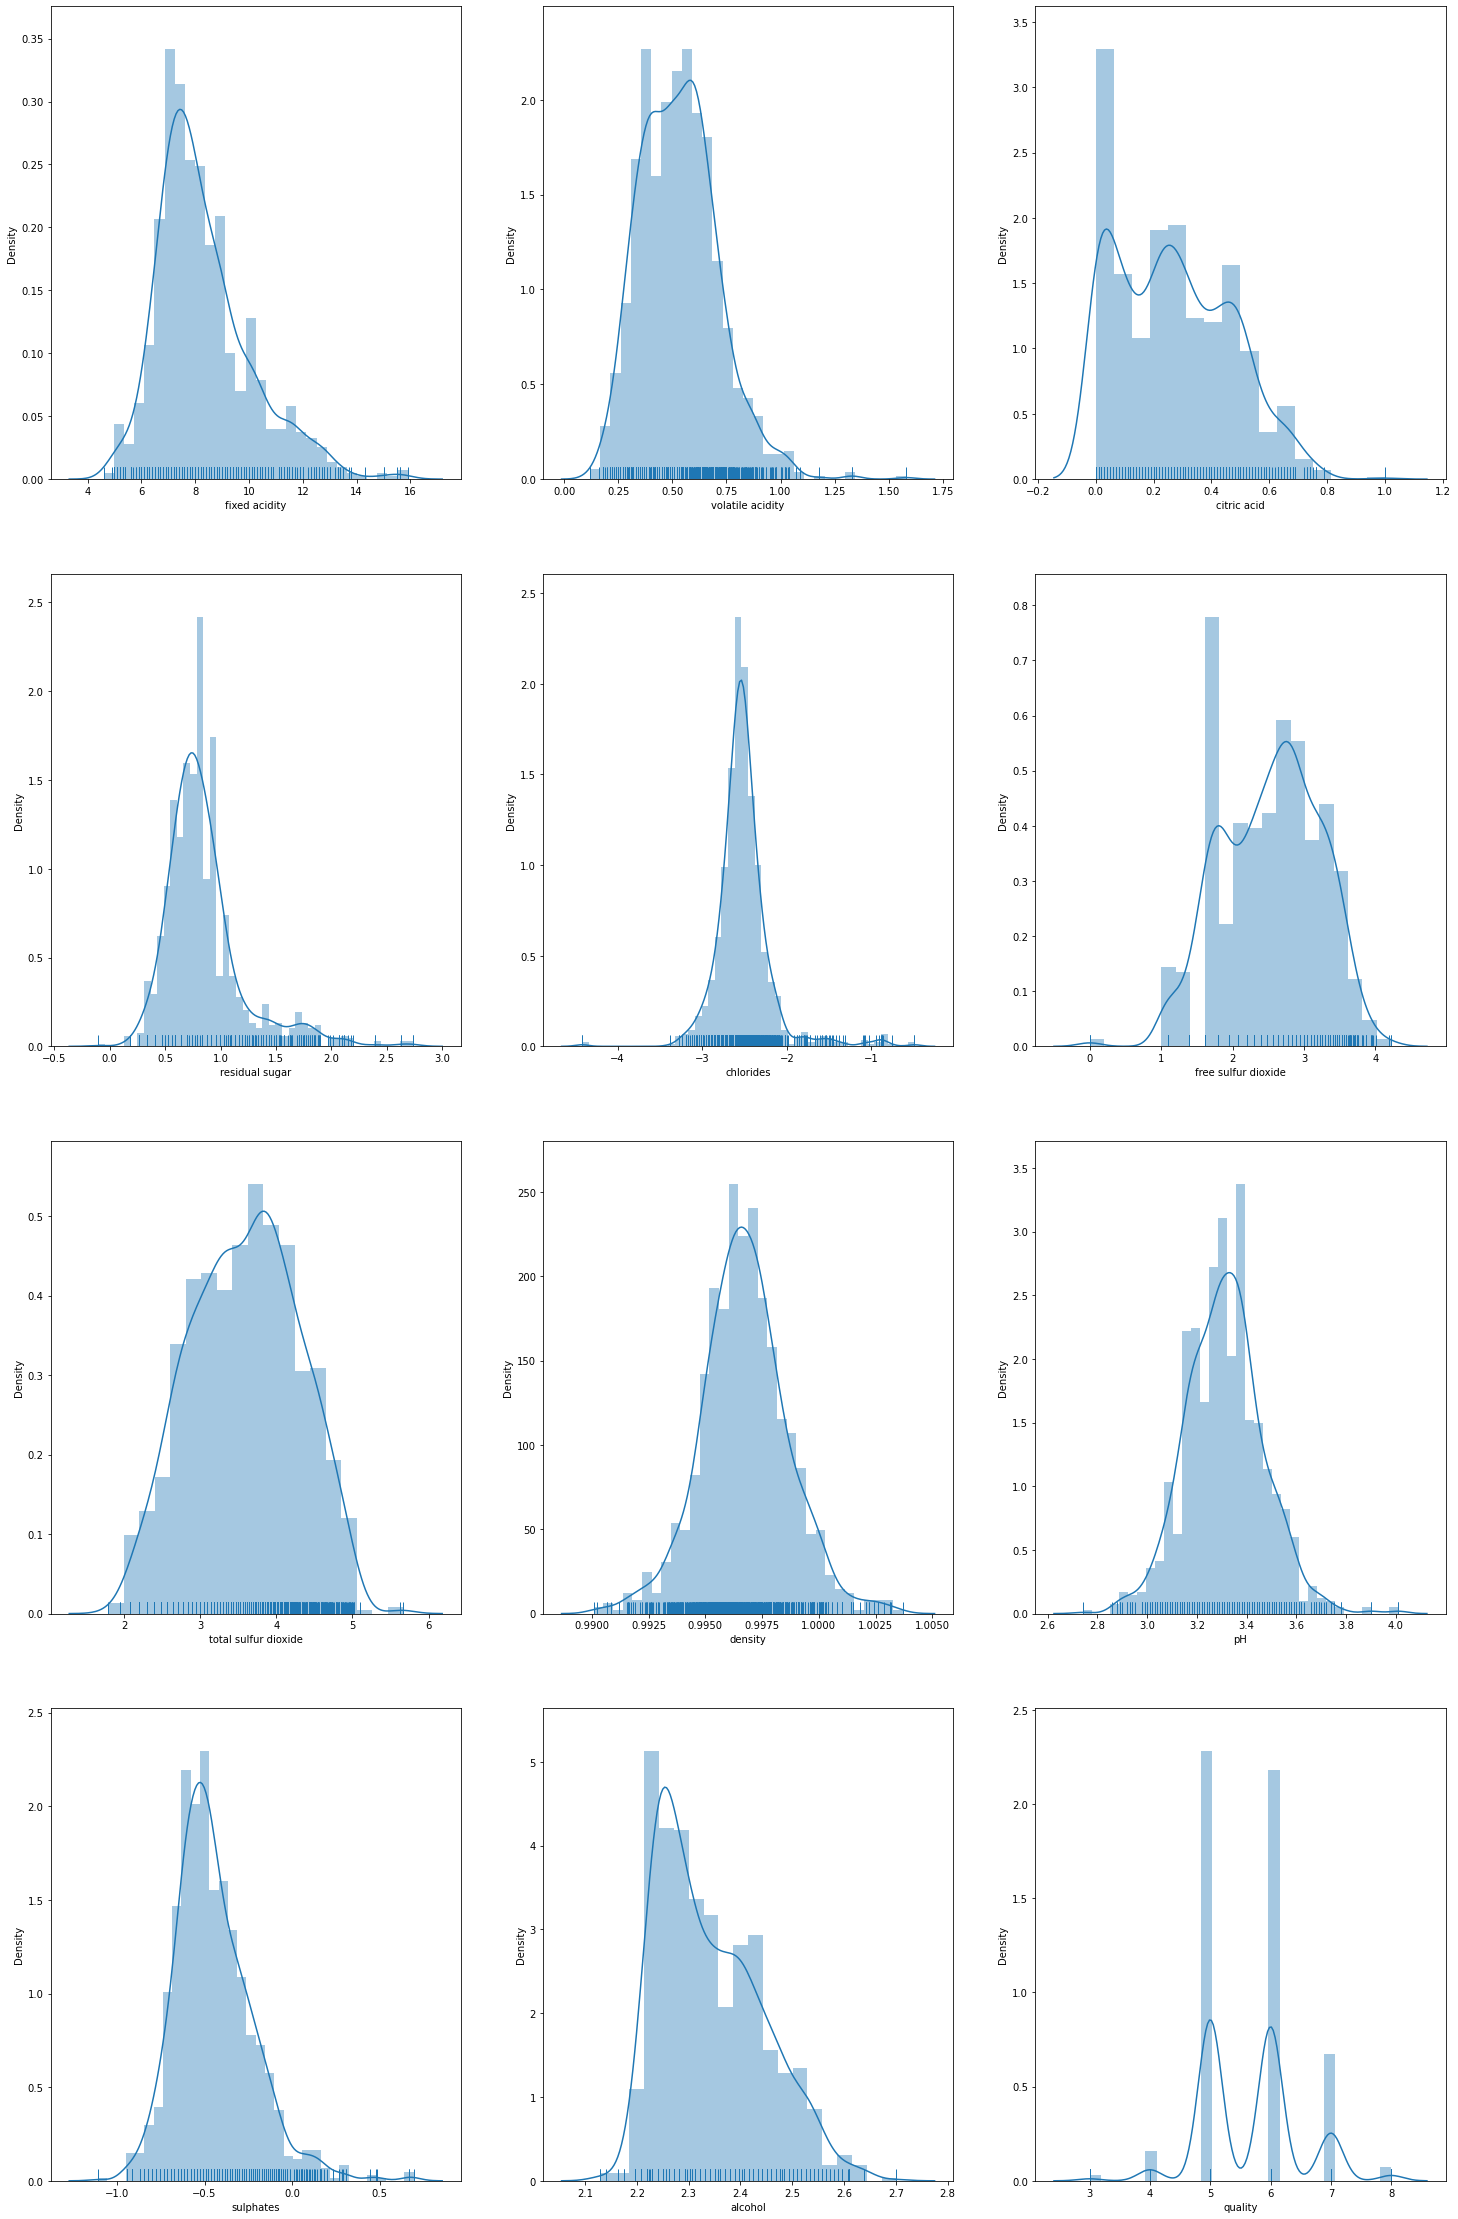

In [28]:
fig, ax = plt.subplots(4, 3, figsize=(25, 40))
k = 0

for i in range(4):
  for j in range(3):

    sns.distplot(df[col[k]], rug=True, axlabel=col[k], ax=ax[i][j])
    k += 1

In [29]:
# creating X-->input feature vector and y-->output feature vector

X = df.drop('quality', axis = 1)
y = df['quality']

In [30]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=21)

In [31]:
# normalizing the dataset

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)

### Apply Light Gradient Boost (LGBM) Classifier

In [32]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()

# fitting the model to the training set
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [33]:
from pycaret.classification import *

In [34]:
train_quality = setup(data = df, target = 'quality', session_id=42,
                  normalize = True,
                  transformation = True, 
                  log_experiment = True,
                  handle_unknown_categorical = True, 
                  unknown_categorical_method = 'most_frequent',
                  remove_multicollinearity = True, #drop one of the two features that are highly correlated with each other
                  ignore_low_variance = True,#all categorical features with statistically insignificant variances are removed from the datasada.
                  combine_rare_levels = True,# all levels in categorical features below the threshold defined in rare_level_threshold param are combined togadaher as a single level
                    normalize_method='robust',    
            train_size = 0.8,fix_imbalance = True,silent=True
                )

,Description,Value
0,session_id,42
1,Target,quality
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(1143, 13)"
5,Missing Values,False
6,Numeric Features,12
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


2022/05/03 02:53:54 INFO mlflow.tracking.fluent: Experiment with name 'clf-default-name' does not exist. Creating a new experiment.
